In [101]:
# Import dependencies

import pandas as pd
import numpy as np
import matplotlib as matplot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.patches as mpatches

pd.set_option('display.max_columns', None)

## Clean data

In [102]:
# Import data

df=pd.read_csv('Resources/all_staff_23-24.csv')
df.head()

,Employee Number,Employee,Position Type Code,Position Distributions Assignment Type Descriptions,Entered FTE,Hourly Pay,Position Distributions Building Descriptions,Assignment Total Pay,Start Date,End Date,Active,Hire Date Original,Termination Date,Calendar Code,Ethnicity and Race,Gender,Birth Date
0,20337,"AAKER, DANIEL J",LICENSED,INSTR EBD,1.0000,58.01,NORTH EDUCATION CENTER,"85,384.00",07/01/2023,06/10/2024,True,08/21/2012,NaN,2209 184,"Non-Hispanic/Latino, White",M - Male,04/15/1981
1,21200,"AARON, ERIK L",ESP,EDUCATIONAL SUPPORT PROFESSION,0.9375,24.68,WEST EDUCATION CENTER,"29,245.82",07/01/2023,06/09/2024,True,12/12/2016,NaN,2209 181,"Non-Hispanic/Latino, Black",M - Male,12/13/1970
2,19657,"ABDALLA, AHMED E",ESP,EDUCATIONAL SUPPORT PROFESSION,1.0000,27.29,SOUTH EDUCATION CENTER,"39,515.92",07/01/2023,06/09/2024,True,06/17/2008,NaN,2209 181,"Non-Hispanic/Latino, White",M - Male,11/21/1982
3,19874,"ABREU ARMSTRONG, AMBER L",EXTENDED,EDUCATIONAL SUPPORT PROFESSION,0.5000,26.31,NORTH EDUCATION CENTER,789.30,07/10/2023,07/28/2023,False,07/01/2009,07/28/2023,SUMMER23,"Hispanic/Latino, Multi-Race",F - Female,05/04/1989
4,22046,"ACQUAYE, JUDE A",ESP,EDUCATIONAL SUPPORT PROFESSION,0.9375,19.96,PARAGON,"27,095.70",07/01/2023,06/09/2024,True,03/02/2022,NaN,2209 181,"Non-Hispanic/Latino, Black",M - Male,03/28/1999


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2092 entries, 0 to 2091
Data columns (total 17 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Employee Number                                      2092 non-null   int64  
 1   Employee                                             2092 non-null   object 
 2   Position Type Code                                   2092 non-null   object 
 3   Position Distributions Assignment Type Descriptions  2092 non-null   object 
 4   Entered FTE                                          2092 non-null   float64
 5   Hourly Pay                                           2092 non-null   float64
 6   Position Distributions Building Descriptions         2092 non-null   object 
 7   Assignment Total Pay                                 2092 non-null   object 
 8   Start Date                                           2092 non-null  

In [104]:
# Rename columns

df=df.rename(columns={'Position Type Code':'Position Type', 
                      'Position Distributions Assignment Type Descriptions':'Position',
                      'Position Distributions Building Descriptions':'Site/Location', 
                      'Hire Date Original':'Hire Date'})

In [105]:
# Convert date columns to datetime format

df['Hire Date']=pd.to_datetime(df['Hire Date'])
df['Birth Date']=pd.to_datetime(df['Birth Date'])
df['Start Date']=pd.to_datetime(df['Start Date'])
df['Termination Date']=pd.to_datetime(df['Termination Date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2092 entries, 0 to 2091
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee Number       2092 non-null   int64         
 1   Employee              2092 non-null   object        
 2   Position Type         2092 non-null   object        
 3   Position              2092 non-null   object        
 4   Entered FTE           2092 non-null   float64       
 5   Hourly Pay            2092 non-null   float64       
 6   Site/Location         2092 non-null   object        
 7   Assignment Total Pay  2092 non-null   object        
 8   Start Date            2092 non-null   datetime64[ns]
 9   End Date              2092 non-null   object        
 10  Active                2092 non-null   bool          
 11  Hire Date             2092 non-null   datetime64[ns]
 12  Termination Date      314 non-null    datetime64[ns]
 13  Calendar Code     

In [106]:
# Assign school year 
school_year='23-24'

# Fiscal year start and end
fiscal_year_start='2023-07-01'
fiscal_year_end='2024-06-30'

In [107]:
df['Position Type'].value_counts()

Position Type
ESP         396
LICENSED    362
EXTENDED    343
TEMP NSO    295
SUMMERTH    168
WSSS        129
TEMPHIRE    125
284          90
UNAFF        53
ADMIN        45
INTERPRE     18
BOARD        14
COCURRIC     14
SSC          11
TEMPCONT     10
OVERAGE      10
TEMP CR       4
EMPLOAN       3
HCSPECIA      1
24TEMPCO      1
Name: count, dtype: int64

In [108]:
# Remove position types to be excluded from analysis

excluded_types=['OVERAGE', 'EXTENDED', 'SUMMERTH', 'WSSS', 'TEMPHIRE', 'TEMPCONT', 'COCURRIC', 'CAREER', 'EMPLOAN', 'TEMP CR', '24TEMPCO', 'TEMP NSO']
df=df[~(df['Position Type'].isin(excluded_types))]
df['Position Type'].value_counts()

Position Type
ESP         396
LICENSED    362
284          90
UNAFF        53
ADMIN        45
INTERPRE     18
BOARD        14
SSC          11
HCSPECIA      1
Name: count, dtype: int64

In [109]:
# Combine position types

df.loc[df['Position Type'].isin(['INTERPRE', 'HCSPECIA']), 'Position Type']='NON-LICENSED'
df['Position Type'].value_counts()

Position Type
ESP             396
LICENSED        362
284              90
UNAFF            53
ADMIN            45
NON-LICENSED     19
BOARD            14
SSC              11
Name: count, dtype: int64

In [110]:
df[df['Position Type']=='ADMIN']['Position'].value_counts()

Position
ASSISTANT PRINCIPAL               13
PRINCIPAL                          6
SENIOR MANAGER, SPECIAL ED         4
ASST DIRECTOR OF SPEC ED           2
EXEC DIRECTOR OF BUSINES           2
EX DIRECTOR - STUDENT SUPPORTS     1
SR MGR, SCHOOL & COMM OUTREACH     1
DIRECTOR OF HUMAN RESOUR           1
DIRECTOR OF FINANCE                1
FACILITIES OPERATIONS SR MNGR      1
DIRECTOR OF TEACHING & L           1
OPERATIONS MANAGER - NSO           1
PROFESSIONAL LEARNING MANAGER      1
EX DIRECTOR LEADERSHIP & LEARN     1
DIRECTOR OF TECHNOLOGY & SIS       1
ASSISTANT SUPERINTENDENT           1
DIR OF COMM & PR                   1
SENIOR MANAGER, FINANCE            1
HR & LABOR RELATIONS SR MNGR       1
SUPERINTENDENT                     1
DIR SPECIAL ED & ITINERANT SER     1
SENIOR MANAGER - MENTAL HEALTH     1
DIRECTOR OF EQUITY & INCLUSION     1
Name: count, dtype: int64

In [111]:
df.loc[df['Position']=='ASSISTANT PRINCIPAL', 'Position Type']='ASSTPRIN'
df.loc[df['Position']=='PRINCIPAL', 'Position Type']='PRINCIPL'
df['Position Type'].value_counts()

Position Type
ESP             396
LICENSED        362
284              90
UNAFF            53
ADMIN            26
NON-LICENSED     19
BOARD            14
ASSTPRIN         13
SSC              11
PRINCIPL          6
Name: count, dtype: int64

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 990 entries, 0 to 2091
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee Number       990 non-null    int64         
 1   Employee              990 non-null    object        
 2   Position Type         990 non-null    object        
 3   Position              990 non-null    object        
 4   Entered FTE           990 non-null    float64       
 5   Hourly Pay            990 non-null    float64       
 6   Site/Location         990 non-null    object        
 7   Assignment Total Pay  990 non-null    object        
 8   Start Date            990 non-null    datetime64[ns]
 9   End Date              990 non-null    object        
 10  Active                990 non-null    bool          
 11  Hire Date             990 non-null    datetime64[ns]
 12  Termination Date      164 non-null    datetime64[ns]
 13  Calendar Code         99

In [113]:
# Sort employees due to duplicate assignments. 
# Keep assignment with the latest start date, if assignments have same start dates keep assignment with the highest FTE.

df=df.sort_values(by=['Employee Number', 'Start Date', 'Entered FTE'], ascending=False)

In [114]:
# Drop duplicate assignments
df=df.drop_duplicates(subset='Employee Number', keep='first')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 934 entries, 63 to 1316
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee Number       934 non-null    int64         
 1   Employee              934 non-null    object        
 2   Position Type         934 non-null    object        
 3   Position              934 non-null    object        
 4   Entered FTE           934 non-null    float64       
 5   Hourly Pay            934 non-null    float64       
 6   Site/Location         934 non-null    object        
 7   Assignment Total Pay  934 non-null    object        
 8   Start Date            934 non-null    datetime64[ns]
 9   End Date              934 non-null    object        
 10  Active                934 non-null    bool          
 11  Hire Date             934 non-null    datetime64[ns]
 12  Termination Date      162 non-null    datetime64[ns]
 13  Calendar Code         9

In [115]:
df['Position Type'].value_counts()

Position Type
LICENSED        356
ESP             355
284              82
UNAFF            53
ADMIN            26
NON-LICENSED     19
BOARD            14
ASSTPRIN         12
SSC              11
PRINCIPL          6
Name: count, dtype: int64

In [116]:
# Calculate age column

age = pd.to_datetime(fiscal_year_start)-pd.to_datetime(df['Birth Date'])
df['Age']=round((age.dt.days/365))
df.head()

,Employee Number,Employee,Position Type,Position,Entered FTE,Hourly Pay,Site/Location,Assignment Total Pay,Start Date,End Date,Active,Hire Date,Termination Date,Calendar Code,Ethnicity and Race,Gender,Birth Date,Age
63,22557,"ARENA, PAUL",ESP,EDUCATIONAL SUPPORT PROFESSION,0.9375,26.36,SOUTH EDUCATION CENTER,"1,779.30",2024-05-20,05/31/2024,False,2024-05-20,2024-05-31,2209 181,"Non-Hispanic/Latino, White",M - Male,1975-02-07,48.0
1546,22553,"RANKIN, SEMAJ R",ESP,EDUCATIONAL SUPPORT PROFESSION,0.9375,22.26,SOUTH EDUCATION CENTER,"2,337.30",2024-05-20,06/09/2024,True,2024-05-20,NaT,2209 181,"Non-Hispanic/Latino, Black",F - Female,1998-07-25,25.0
1080,22551,"LEE, KATIE M",ESP,EDUCATIONAL SUPPORT PROFESSION,0.9375,21.13,SOUTH EDUCATION CENTER,"2,218.65",2024-05-20,06/09/2024,True,2024-05-20,NaT,2209 181,"Non-Hispanic/Latino, White",F - Female,2002-07-03,21.0
1117,22545,"LOPEZ MELGAR, HERIBERTA",ESP,EDUCATIONAL SUPPORT PROFESSION,0.9375,20.86,SOUTH EDUCATION CENTER,"2,972.55",2024-05-13,06/09/2024,True,2024-05-13,NaT,2209 181,"Hispanic/Latino, White",F - Female,1984-02-04,39.0
545,22538,"FALTESEK, DREONNA R",ESP,EDUCATIONAL SUPPORT PROFESSION,0.9375,21.24,WEST EDUCATION CENTER,"4,301.10",2024-05-01,06/09/2024,True,2024-05-01,NaT,2209 181,"Non-Hispanic/Latino, White",F - Female,2000-08-21,23.0


In [143]:
# Categorize ages into groups

df.loc[(df['Age']>=18) & (df['Age']<=25), 'Age Group']='18-25'
df.loc[(df['Age']>25) & (df['Age']<=35), 'Age Group']='25-35'
df.loc[(df['Age']>35) & (df['Age']<=45), 'Age Group']='35-45'
df.loc[(df['Age']>45) & (df['Age']<=55), 'Age Group']='45-55'
df.loc[(df['Age']>55) & (df['Age']<=65), 'Age Group']='55-65'
df.loc[(df['Age']>65), 'Age Group']='>65'
df['Age Group'].value_counts().to_frame().reindex(['18-25', '25-35', '35-45', '45-55', '55-65', '>65'])

,count
Age Group,
18-25,73
25-35,184
35-45,287
45-55,201
55-65,168
>65,20


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 934 entries, 63 to 1316
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee Number       934 non-null    int64         
 1   Employee              934 non-null    object        
 2   Position Type         934 non-null    object        
 3   Position              934 non-null    object        
 4   Entered FTE           934 non-null    float64       
 5   Hourly Pay            934 non-null    float64       
 6   Site/Location         934 non-null    object        
 7   Assignment Total Pay  934 non-null    object        
 8   Start Date            934 non-null    datetime64[ns]
 9   End Date              934 non-null    object        
 10  Active                934 non-null    bool          
 11  Hire Date             934 non-null    datetime64[ns]
 12  Termination Date      162 non-null    datetime64[ns]
 13  Calendar Code         9

In [119]:
# Correct original hire date and termination date for any re-hired employees (identified in later step)

df.loc[df['Employee Number']==22020, 'Hire Date']=pd.to_datetime('2021-11-03')
df.loc[df['Employee Number']==22020, 'Termination Date']=pd.to_datetime('2023-10-04')

In [120]:
# For retroactive analysis, do not use Active column since this is the employee's current status.
# Determine employees' retention status using fiscal year end as termination cutoff date

df.loc[df['Termination Date']<=fiscal_year_end, 'Retention']=0
df.loc[~(df['Termination Date']<=fiscal_year_end), 'Retention']=1
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 934 entries, 63 to 1316
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee Number       934 non-null    int64         
 1   Employee              934 non-null    object        
 2   Position Type         934 non-null    object        
 3   Position              934 non-null    object        
 4   Entered FTE           934 non-null    float64       
 5   Hourly Pay            934 non-null    float64       
 6   Site/Location         934 non-null    object        
 7   Assignment Total Pay  934 non-null    object        
 8   Start Date            934 non-null    datetime64[ns]
 9   End Date              934 non-null    object        
 10  Active                934 non-null    bool          
 11  Hire Date             934 non-null    datetime64[ns]
 12  Termination Date      163 non-null    datetime64[ns]
 13  Calendar Code         9

In [121]:
# Calculate length of employment for retained employees using end of period defined above
time_employed_active=pd.to_datetime(fiscal_year_end)-df['Hire Date']

# Calculate length of employment for terminated employees
time_employed_term=df['Termination Date']-df['Hire Date']

# Create Years Employed column using formulas above
df.loc[df['Retention']==1, 'Years Employed']=round((time_employed_active.dt.days/365),2)
df.loc[df['Retention']==0, 'Years Employed']=round((time_employed_term.dt.days/365),2)

df.head()

,Employee Number,Employee,Position Type,Position,Entered FTE,Hourly Pay,Site/Location,Assignment Total Pay,Start Date,End Date,Active,Hire Date,Termination Date,Calendar Code,Ethnicity and Race,Gender,Birth Date,Age,Age Group,Retention,Years Employed
63,22557,"ARENA, PAUL",ESP,EDUCATIONAL SUPPORT PROFESSION,0.9375,26.36,SOUTH EDUCATION CENTER,"1,779.30",2024-05-20,05/31/2024,False,2024-05-20,2024-05-31,2209 181,"Non-Hispanic/Latino, White",M - Male,1975-02-07,48.0,45-55,0.0,0.03
1546,22553,"RANKIN, SEMAJ R",ESP,EDUCATIONAL SUPPORT PROFESSION,0.9375,22.26,SOUTH EDUCATION CENTER,"2,337.30",2024-05-20,06/09/2024,True,2024-05-20,NaT,2209 181,"Non-Hispanic/Latino, Black",F - Female,1998-07-25,25.0,18-25,1.0,0.11
1080,22551,"LEE, KATIE M",ESP,EDUCATIONAL SUPPORT PROFESSION,0.9375,21.13,SOUTH EDUCATION CENTER,"2,218.65",2024-05-20,06/09/2024,True,2024-05-20,NaT,2209 181,"Non-Hispanic/Latino, White",F - Female,2002-07-03,21.0,18-25,1.0,0.11
1117,22545,"LOPEZ MELGAR, HERIBERTA",ESP,EDUCATIONAL SUPPORT PROFESSION,0.9375,20.86,SOUTH EDUCATION CENTER,"2,972.55",2024-05-13,06/09/2024,True,2024-05-13,NaT,2209 181,"Hispanic/Latino, White",F - Female,1984-02-04,39.0,35-45,1.0,0.13
545,22538,"FALTESEK, DREONNA R",ESP,EDUCATIONAL SUPPORT PROFESSION,0.9375,21.24,WEST EDUCATION CENTER,"4,301.10",2024-05-01,06/09/2024,True,2024-05-01,NaT,2209 181,"Non-Hispanic/Latino, White",F - Female,2000-08-21,23.0,18-25,1.0,0.16


<Axes: >

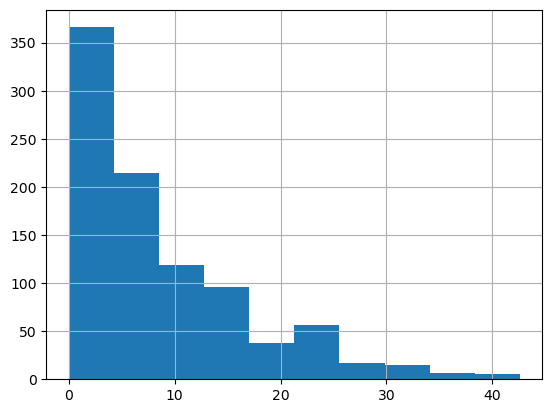

In [122]:
df['Years Employed'].hist()

In [123]:
df['Years Employed'].describe()

count    934.000000
mean       8.555857
std        8.416851
min        0.030000
25%        1.840000
50%        5.850000
75%       12.807500
max       42.580000
Name: Years Employed, dtype: float64

In [124]:
# Correct any employees with years employed <0, possibly a re-hired employee in future year
df[df['Years Employed']<0]

,Employee Number,Employee,Position Type,Position,Entered FTE,Hourly Pay,Site/Location,Assignment Total Pay,Start Date,End Date,Active,Hire Date,Termination Date,Calendar Code,Ethnicity and Race,Gender,Birth Date,Age,Age Group,Retention,Years Employed


In [125]:
# Categorize years employed into groups

df.loc[df['Years Employed']<=1, 'Years Employed (group)']='1 year or less'
df.loc[(df['Years Employed']>1) & (df['Years Employed']<=2), 'Years Employed (group)']='1-2'
df.loc[(df['Years Employed']>2) & (df['Years Employed']<=4), 'Years Employed (group)']='2-4'
df.loc[(df['Years Employed']>4) & (df['Years Employed']<=6), 'Years Employed (group)']='4-6'
df.loc[(df['Years Employed']>6) & (df['Years Employed']<=10), 'Years Employed (group)']='6-10'
df.loc[(df['Years Employed']>10) & (df['Years Employed']<=20), 'Years Employed (group)']='10-20'
df.loc[df['Years Employed']>20, 'Years Employed (group)']='>20'
df['Years Employed (group)'].value_counts().to_frame().reindex(['1 year or less', '1-2', '2-4', '4-6', '6-10', '10-20', '>20'])

,count
Years Employed (group),
1 year or less,164
1-2,102
2-4,93
4-6,122
6-10,150
10-20,196
>20,107


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 934 entries, 63 to 1316
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Employee Number         934 non-null    int64         
 1   Employee                934 non-null    object        
 2   Position Type           934 non-null    object        
 3   Position                934 non-null    object        
 4   Entered FTE             934 non-null    float64       
 5   Hourly Pay              934 non-null    float64       
 6   Site/Location           934 non-null    object        
 7   Assignment Total Pay    934 non-null    object        
 8   Start Date              934 non-null    datetime64[ns]
 9   End Date                934 non-null    object        
 10  Active                  934 non-null    bool          
 11  Hire Date               934 non-null    datetime64[ns]
 12  Termination Date        163 non-null    datetime64[ns

In [127]:
# Export cleaned data 
df.to_csv('Outputs/staff_retention_23-24.csv', index=False)

## Analysis

In [128]:
# Retention Analysis #1: Retention of ONLY staff who started at the beginning of the fiscal year

fy_start_staff=df.loc[~(df['Termination Date']<fiscal_year_start) & (df['Hire Date']<=fiscal_year_start)]
fy_start_staff.info()

<class 'pandas.core.frame.DataFrame'>
Index: 780 entries, 1118 to 1316
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Employee Number         780 non-null    int64         
 1   Employee                780 non-null    object        
 2   Position Type           780 non-null    object        
 3   Position                780 non-null    object        
 4   Entered FTE             780 non-null    float64       
 5   Hourly Pay              780 non-null    float64       
 6   Site/Location           780 non-null    object        
 7   Assignment Total Pay    780 non-null    object        
 8   Start Date              780 non-null    datetime64[ns]
 9   End Date                780 non-null    object        
 10  Active                  780 non-null    bool          
 11  Hire Date               780 non-null    datetime64[ns]
 12  Termination Date        123 non-null    datetime64[

In [129]:
# Retention Analysis #1: Retention of ONLY staff who started at the beginning of the fiscal year

retention_fy_start_staff=pd.concat(
    [fy_start_staff['Retention'].value_counts().to_frame(name='Count'),
     fy_start_staff['Retention'].value_counts(normalize=True).round(3).to_frame(name='Proportion')],
    axis=1)

print('Retention of staff who started at beginning of fiscal year')
retention_fy_start_staff

Retention of staff who started at beginning of fiscal year


,Count,Proportion
Retention,,
1.0,686,0.879
0.0,94,0.121


In [130]:
# Retention Analysis #2: Retention of ONLY staff who started at the beginning of the school year

school_year_start=pd.to_datetime('2023-08-28')
school_year_end=pd.to_datetime('2024-06-30')

sy_start_staff=df.loc[~(df['Termination Date']<school_year_start) & (df['Hire Date']<=school_year_start)]
sy_start_staff.info()

<class 'pandas.core.frame.DataFrame'>
Index: 818 entries, 262 to 1316
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Employee Number         818 non-null    int64         
 1   Employee                818 non-null    object        
 2   Position Type           818 non-null    object        
 3   Position                818 non-null    object        
 4   Entered FTE             818 non-null    float64       
 5   Hourly Pay              818 non-null    float64       
 6   Site/Location           818 non-null    object        
 7   Assignment Total Pay    818 non-null    object        
 8   Start Date              818 non-null    datetime64[ns]
 9   End Date                818 non-null    object        
 10  Active                  818 non-null    bool          
 11  Hire Date               818 non-null    datetime64[ns]
 12  Termination Date        134 non-null    datetime64[n

In [131]:
# Retention Analysis #2: Retention of ONLY staff who started at the beginning of the school year

retention_sy_start_staff=pd.concat(
    [sy_start_staff['Retention'].value_counts().to_frame(name='Count'),
     sy_start_staff['Retention'].value_counts(normalize=True).round(3).to_frame(name='Proportion')],
    axis=1)

print('Retention of staff who started at beginning of school year')
retention_sy_start_staff

Retention of staff who started at beginning of school year


,Count,Proportion
Retention,,
1.0,714,0.873
0.0,104,0.127


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 934 entries, 63 to 1316
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Employee Number         934 non-null    int64         
 1   Employee                934 non-null    object        
 2   Position Type           934 non-null    object        
 3   Position                934 non-null    object        
 4   Entered FTE             934 non-null    float64       
 5   Hourly Pay              934 non-null    float64       
 6   Site/Location           934 non-null    object        
 7   Assignment Total Pay    934 non-null    object        
 8   Start Date              934 non-null    datetime64[ns]
 9   End Date                934 non-null    object        
 10  Active                  934 non-null    bool          
 11  Hire Date               934 non-null    datetime64[ns]
 12  Termination Date        163 non-null    datetime64[ns

In [133]:
# Retention Analysis #3: Retention of all staff who worked during period including mid-year hires

retention_all_staff=pd.concat(
    [
        df['Retention'].value_counts().to_frame(name='Count'),
        df['Retention'].value_counts(normalize=True).round(3).to_frame(name='Proportion')
    ],
    axis=1)

print('Retention of all staff who worked during 23-24 SY')
retention_all_staff

Retention of all staff who worked during 23-24 SY


,Count,Proportion
Retention,,
1.0,810,0.867
0.0,124,0.133


In [134]:
# Retention by position

retention_by_position=pd.concat(
    [
        df.groupby('Position Type')['Retention'].mean().round(3).to_frame(name='Retention').sort_values('Retention'),
        df['Position Type'].value_counts().to_frame(name='Count')
    ],
    axis=1
)

retention_by_position

,Retention,Count
Position Type,,
ASSTPRIN,0.750,12
284,0.805,82
PRINCIPL,0.833,6
ESP,0.837,355
ADMIN,0.846,26
BOARD,0.857,14
UNAFF,0.887,53
NON-LICENSED,0.895,19
SSC,0.909,11


C:\Users\mcyang\AppData\Local\Temp\ipykernel_14820\2554283106.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Position Type',
C:\Users\mcyang\AppData\Local\Temp\ipykernel_14820\2554283106.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


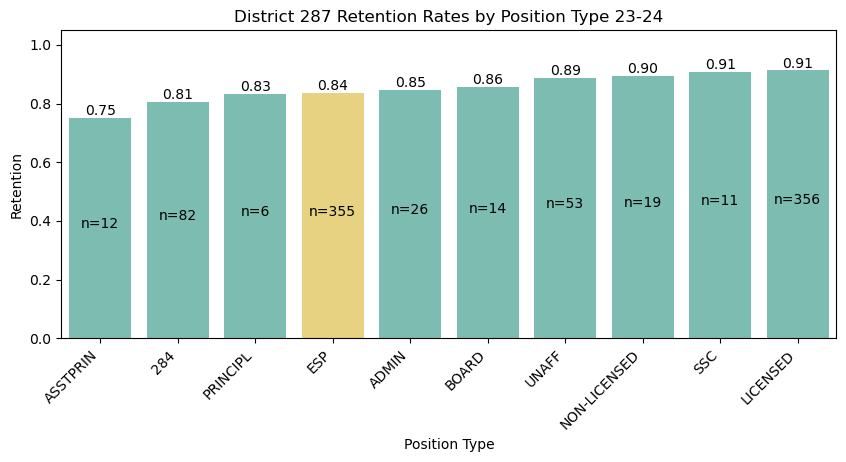

In [135]:
fig = plt.figure(figsize=(10,4))

df_to_plot=retention_by_position
custom_colors={
    'ASSTPRIN':'#73c6b6', 
    'NON-LICENSED':'#73c6b6',
    '284':'#73c6b6',
    'PRINCIPL':'#73c6b6',
    'ADMIN':'#73c6b6',
    'BOARD':'#73c6b6',
    'UNAFF':'#73c6b6',
    'LICENSED':'#73c6b6',
    'SSC':'#73c6b6',
    'ESP':'#f7dc6f'
}
    
ax = sns.barplot(x='Position Type', 
            y='Retention',  
            data=df_to_plot, 
            palette=custom_colors, 
            errorbar=None
            )

# Display retention value on top of bars
for p in ax.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + .01, f'{height:.2f}', 
             ha='center', va='baseline', fontsize=10, color='black')

#  Display n values in center of bars
x = 0  # Counter for index tracking
for p in ax.patches: 
    num = df_to_plot['Count'].values[x]  # Extract corresponding count value
    height = p.get_height()  # Get bar height
    plt.text(
        p.get_x() + p.get_width() / 2, height/2, 
        f'n={num}', ha='center', va='baseline',  # Align text
        fontsize=10, color='black'
    )
    x += 1  # Move to next index

plt.ylim(0,1.05)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Title of chart and file name
plt.title(f'District 287 Retention Rates by Position Type {school_year}')
plt.savefig('Outputs/retention_by_position', bbox_inches='tight')

plt.show()

In [136]:
# Retention by Ethnicity/Race

retention_by_race=pd.concat(
    [
        df.groupby('Ethnicity and Race')['Retention'].mean().to_frame(name='Retention').sort_values('Retention'),
        df['Ethnicity and Race'].value_counts().to_frame(name='Count')
    ],
    axis=1
)

retention_by_race

,Retention,Count
Ethnicity and Race,,
"Non-Hispanic/Latino, Multi-Race",0.714286,35
"Non-Hispanic/Latino, Black",0.810484,248
"Non-Hispanic/Latino, Asian",0.851852,27
"Non-Hispanic/Latino, White",0.894378,587
"Hispanic/Latino, White",0.965517,29
"Hispanic/Latino, Amer Indian",1.000000,3
"Hispanic/Latino, Black",1.000000,1
"Hispanic/Latino, Multi-Race",1.000000,3
"Non-Hispanic/Latino, Amer Indian",1.000000,1


C:\Users\mcyang\AppData\Local\Temp\ipykernel_14820\282349316.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


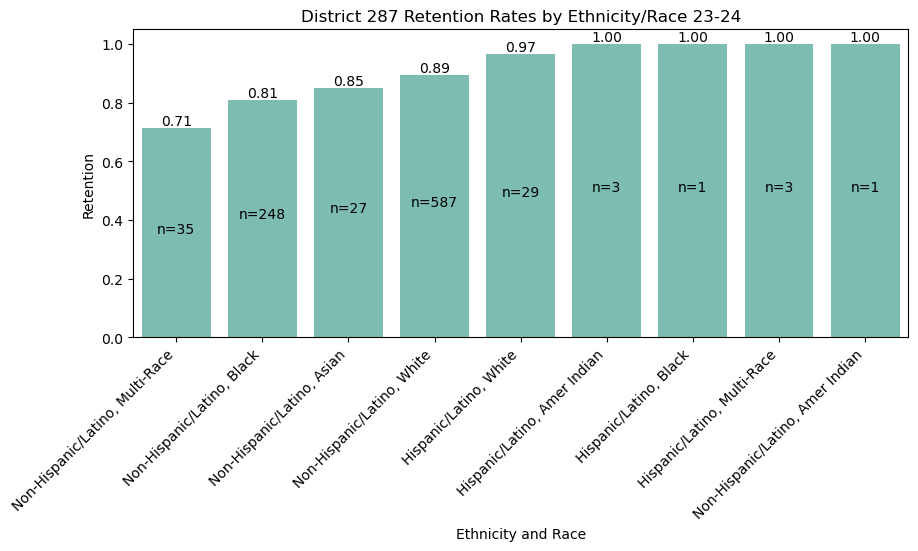

In [137]:
fig = plt.figure(figsize=(10,4))

df_to_plot=retention_by_race

ax = sns.barplot(x='Ethnicity and Race', 
            y='Retention',  
            data=df_to_plot, 
            color='#73c6b6', 
            errorbar=None
            )
# Display retention value on top of bars
for p in ax.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + .01, f'{height:.2f}', 
             ha='center', va='baseline', fontsize=10, color='black')

#  Display n values in center of bars
x = 0  # Counter for index tracking
for p in ax.patches: 
    num = df_to_plot['Count'].values[x]  # Extract corresponding count value
    height = p.get_height()  # Get bar height
    plt.text(
        p.get_x() + p.get_width() / 2, height/2, 
        f'n={num}', ha='center', va='baseline',  # Align text
        fontsize=10, color='black'
    )
    x += 1  # Move to next index

plt.ylim(0,1.05)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Title of chart and file name
plt.title(f'District 287 Retention Rates by Ethnicity/Race {school_year}')
plt.savefig('Outputs/retention_by_race', bbox_inches='tight')

plt.show()

In [138]:
retention_by_years_employed=pd.concat(
    [
        df.groupby('Years Employed (group)')['Retention'].mean().to_frame(name='Retention').sort_values('Retention'),
        df['Years Employed (group)'].value_counts().to_frame(name='Count')
    ],
    axis=1
).reindex(['1 year or less', '1-2', '2-4', '4-6', '6-10', '10-20', '>20'])
retention_by_years_employed

,Retention,Count
Years Employed (group),,
1 year or less,0.756098,164
1-2,0.794118,102
2-4,0.870968,93
4-6,0.877049,122
6-10,0.933333,150
10-20,0.918367,196
>20,0.906542,107


C:\Users\mcyang\AppData\Local\Temp\ipykernel_14820\3428931176.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')


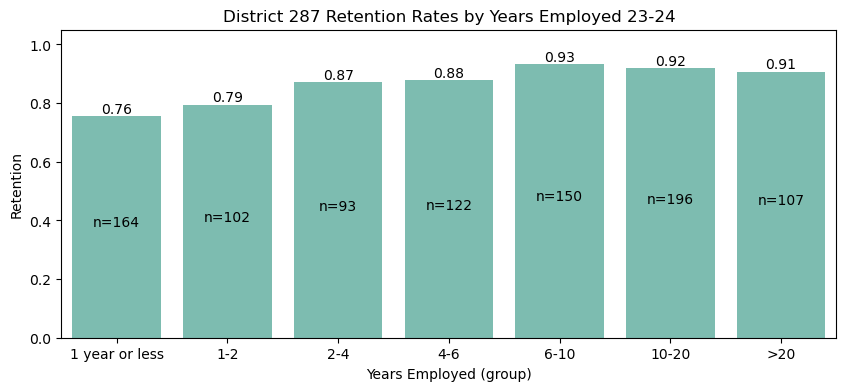

In [139]:
fig = plt.figure(figsize=(10,4))

df_to_plot=retention_by_years_employed

ax = sns.barplot(x='Years Employed (group)', 
            y='Retention',  
            data=df_to_plot, 
            color='#73c6b6', 
            errorbar=None
            )

# Display retention value on top of bars
for p in ax.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + .01, f'{height:.2f}', 
             ha='center', va='baseline', fontsize=10, color='black')

#  Display n values in center of bars
x = 0  # Counter for index tracking
for p in ax.patches: 
    num = df_to_plot['Count'].values[x]  # Extract corresponding count value
    height = p.get_height()  # Get bar height
    plt.text(
        p.get_x() + p.get_width() / 2, height/2, 
        f'n={num}', ha='center', va='baseline',  # Align text
        fontsize=10, color='black'
    )
    x += 1  # Move to next index

plt.ylim(0,1.05)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')

# Title of chart and file name
plt.title(f'District 287 Retention Rates by Years Employed {school_year}')
plt.savefig('Outputs/retention_by_years_employed', bbox_inches='tight')

plt.show()

## ESP Analysis

In [140]:
esp_df=df[df['Position Type']=='ESP']

esp_retention_by_race=pd.concat(
    [
        esp_df.groupby('Ethnicity and Race')['Retention'].mean().to_frame(name='Retention').sort_values('Retention'),
        esp_df['Ethnicity and Race'].value_counts().to_frame(name='Count')
    ],
    axis=1
)
esp_retention_by_race

,Retention,Count
Ethnicity and Race,,
"Non-Hispanic/Latino, Asian",0.666667,9
"Non-Hispanic/Latino, Multi-Race",0.666667,18
"Non-Hispanic/Latino, Black",0.812500,192
"Non-Hispanic/Latino, White",0.884956,113
"Hispanic/Latino, Amer Indian",1.000000,2
"Hispanic/Latino, Black",1.000000,1
"Hispanic/Latino, Multi-Race",1.000000,2
"Hispanic/Latino, White",1.000000,18


C:\Users\mcyang\AppData\Local\Temp\ipykernel_14820\2767954880.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


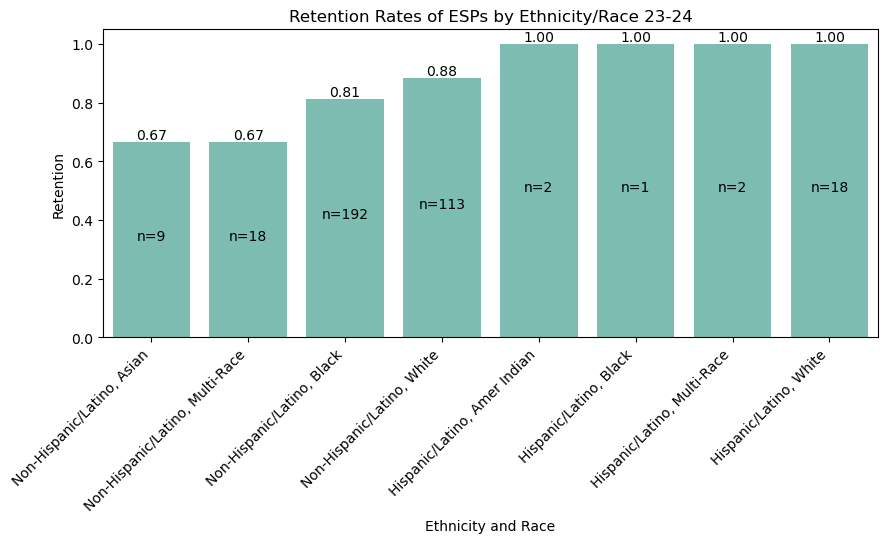

In [141]:
fig = plt.figure(figsize=(10,4))

df_to_plot=esp_retention_by_race

ax = sns.barplot(x='Ethnicity and Race', 
            y='Retention',  
            data=df_to_plot, 
            color='#73c6b6', 
            errorbar=None
            )
# Display retention value on top of bars
for p in ax.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + .01, f'{height:.2f}', 
             ha='center', va='baseline', fontsize=10, color='black')

#  Display n values in center of bars
x = 0  # Counter for index tracking
for p in ax.patches: 
    num = df_to_plot['Count'].values[x]  # Extract corresponding count value
    height = p.get_height()  # Get bar height
    plt.text(
        p.get_x() + p.get_width() / 2, height/2, 
        f'n={num}', ha='center', va='baseline',  # Align text
        fontsize=10, color='black'
    )
    x += 1  # Move to next index

plt.ylim(0,1.05)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Title of chart and file name
plt.title(f'Retention Rates of ESPs by Ethnicity/Race {school_year}')
plt.savefig('Outputs/retention_esps_by_race', bbox_inches='tight')

plt.show()

In [142]:
esp_retention_by_age=pd.concat(
    [
        esp_df.groupby('Age Group')['Retention'].mean().to_frame(name='Retention').sort_values('Retention'),
        esp_df['Age Group'].value_counts().to_frame(name='Count')
    ],
    axis=1
).reindex(['18-24', '25-34', '35-44', '45-54', '55-64', '>65'])
esp_retention_by_age

,Retention,Count
Age Group,,
18-24,NaN,NaN
25-34,NaN,NaN
35-44,NaN,NaN
45-54,NaN,NaN
55-64,NaN,NaN
>65,0.555556,9.0


C:\Users\mcyang\AppData\Local\Temp\ipykernel_14820\3424326838.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')


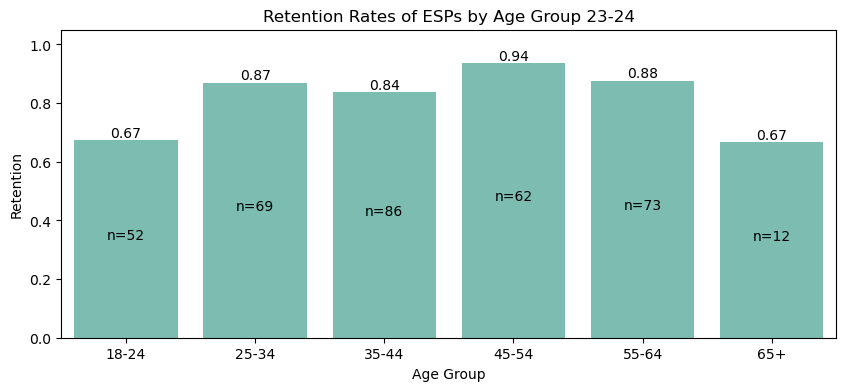

In [96]:
fig = plt.figure(figsize=(10,4))

df_to_plot=esp_retention_by_age

ax = sns.barplot(x='Age Group', 
            y='Retention',  
            data=df_to_plot, 
            color='#73c6b6', 
            errorbar=None
            )
# Display retention value on top of bars
for p in ax.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + .01, f'{height:.2f}', 
             ha='center', va='baseline', fontsize=10, color='black')

#  Display n values in center of bars
x = 0  # Counter for index tracking
for p in ax.patches: 
    num = df_to_plot['Count'].values[x]  # Extract corresponding count value
    height = p.get_height()  # Get bar height
    plt.text(
        p.get_x() + p.get_width() / 2, height/2, 
        f'n={num}', ha='center', va='baseline',  # Align text
        fontsize=10, color='black'
    )
    x += 1  # Move to next index

plt.ylim(0,1.05)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')

# Title of chart and file name
plt.title(f'Retention Rates of ESPs by Age Group {school_year}')
plt.savefig('Outputs/retention_esps_by_age', bbox_inches='tight')

plt.show()

In [97]:
esp_retention_by_years_employed=pd.concat(
    [
        esp_df.groupby('Years Employed (group)')['Retention'].mean().to_frame(name='Retention').sort_values('Retention'),
        esp_df['Years Employed (group)'].value_counts().to_frame(name='Count')
    ],
    axis=1
).reindex(['1 year or less', '1-2', '2-4', '4-6', '6-10', '10-20', '>20'])
esp_retention_by_years_employed

,Retention,Count
Years Employed (group),,
1 year or less,0.699029,103
1-2,0.780488,41
2-4,0.923077,26
4-6,0.888889,36
6-10,0.910714,56
10-20,0.981481,54
>20,0.846154,39


C:\Users\mcyang\AppData\Local\Temp\ipykernel_14820\118985027.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')


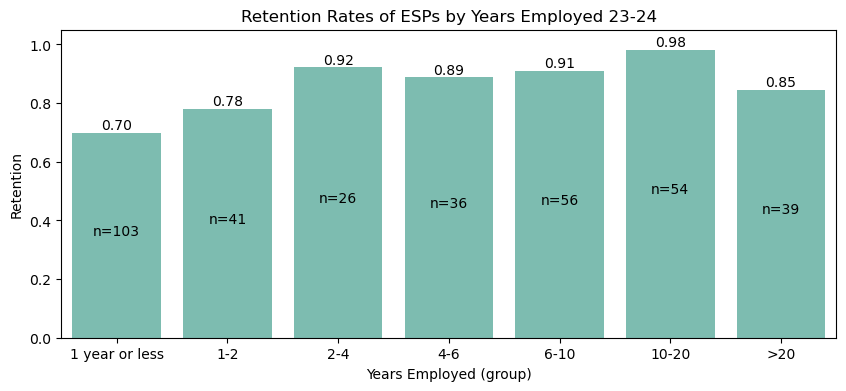

In [98]:
fig = plt.figure(figsize=(10,4))

df_to_plot=esp_retention_by_years_employed

ax = sns.barplot(x='Years Employed (group)', 
            y='Retention',  
            data=df_to_plot, 
            color='#73c6b6', 
            errorbar=None
            )
# Display retention value on top of bars
for p in ax.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + .01, f'{height:.2f}', 
             ha='center', va='baseline', fontsize=10, color='black')

#  Display n values in center of bars
x = 0  # Counter for index tracking
for p in ax.patches: 
    num = df_to_plot['Count'].values[x]  # Extract corresponding count value
    height = p.get_height()  # Get bar height
    plt.text(
        p.get_x() + p.get_width() / 2, height/2, 
        f'n={num}', ha='center', va='baseline',  # Align text
        fontsize=10, color='black'
    )
    x += 1  # Move to next index

plt.ylim(0,1.05)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')

# Title of chart and file name
plt.title(f'Retention Rates of ESPs by Years Employed {school_year}')
plt.savefig('Outputs/retention_esps_by_years_employed', bbox_inches='tight')

plt.show()

In [99]:
esp_df['Site/Location'].value_counts()

Site/Location
NORTH EDUCATION CENTER                127
SOUTH EDUCATION CENTER                 91
ANN BREMER EDUCATION CENTER            79
WEST EDUCATION CENTER                  34
CAREER & TECH CENTER - E.P. CAMPUS      8
PRAIRIECARE BROOKLYN PARK- IHP          5
NORTHERN STAR ONLINE                    3
PRAIRIECARE EDINA                       2
PRAIRIECARE BROOKLYN PARK-PHP           2
DISTRICT SERVICE CENTER                 2
PARAGON                                 1
YOUABLE                                 1
Name: count, dtype: int64

In [47]:
esp_retention_by_site=pd.concat(
    [
        esp_df.groupby('Site/Location')['Retention'].mean().to_frame(name='Retention').sort_values('Retention'),
        esp_df['Site/Location'].value_counts().to_frame(name='Count')
    ],
    axis=1
).sort_values('Retention')

# .reindex(['ANN BREMER EDUCATION CENTER', 'NORTH EDUCATION CENTER', 'SOUTH EDUCATION CENTER', 'WEST EDUCATION CENTER', 'CAREER & TECH CENTER - E.P. CAMPUS',
#            'NORTHERN STAR ONLINE', 'DISTRICT SERVICE CENTER', 'PRAIRIECARE EDINA', 'PRAIRIECARE BROOKLYN PARK- IHP', 'PARAGON', 'PRAIRIECARE BROOKLYN PARK-PHP',
#            'YOUABLE'])
esp_retention_by_site

,Retention,Count
Site/Location,,
SOUTH EDUCATION CENTER,0.725275,91
WEST EDUCATION CENTER,0.794118,34
PRAIRIECARE BROOKLYN PARK- IHP,0.800000,5
ANN BREMER EDUCATION CENTER,0.873418,79
NORTH EDUCATION CENTER,0.881890,127
CAREER & TECH CENTER - E.P. CAMPUS,1.000000,8
DISTRICT SERVICE CENTER,1.000000,2
NORTHERN STAR ONLINE,1.000000,3
PARAGON,1.000000,1


C:\Users\mcyang\AppData\Local\Temp\ipykernel_14820\4229573350.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


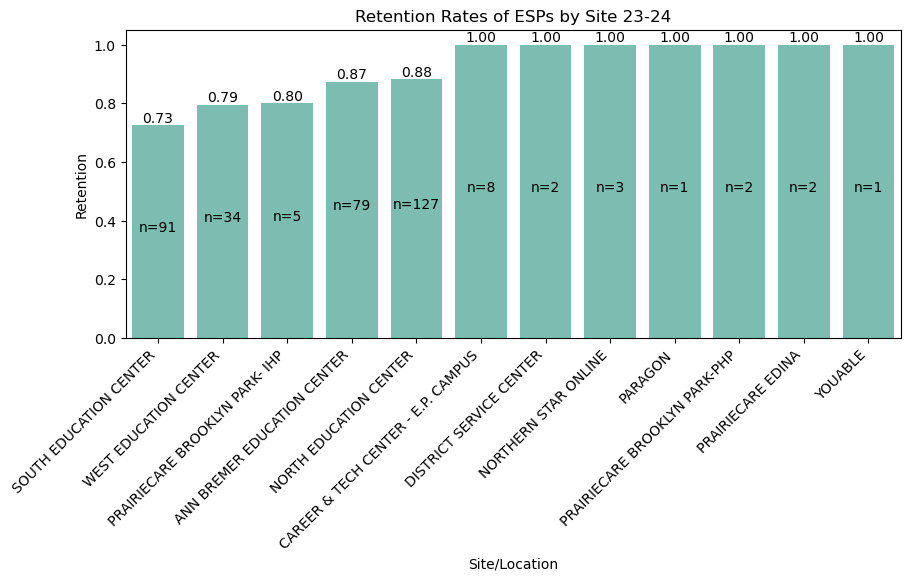

In [48]:
fig = plt.figure(figsize=(10,4))

df_to_plot=esp_retention_by_site

ax = sns.barplot(x='Site/Location', 
            y='Retention',  
            data=df_to_plot, 
            color='#73c6b6', 
            errorbar=None
            )
# Display retention value on top of bars
for p in ax.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + .01, f'{height:.2f}', 
             ha='center', va='baseline', fontsize=10, color='black')

#  Display n values in center of bars
x = 0  # Counter for index tracking
for p in ax.patches: 
    num = df_to_plot['Count'].values[x]  # Extract corresponding count value
    height = p.get_height()  # Get bar height
    plt.text(
        p.get_x() + p.get_width() / 2, height/2, 
        f'n={num}', ha='center', va='baseline',  # Align text
        fontsize=10, color='black'
    )
    x += 1  # Move to next index

plt.ylim(0,1.05)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Title of chart and file name
plt.title(f'Retention Rates of ESPs by Site {school_year}')
plt.savefig('Outputs/retention_esps_by_site', bbox_inches='tight')

plt.show()